<a href="https://colab.research.google.com/github/pravin-raut/TimeSeries_USD-EUR_WithOilImpact/blob/Master/04_Currency_%26_Oil_Forecast_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import time
start_time = time.time()


#Read the data file created with Feature from 01.Currency_&_Oil_Forecast_Visualization.ipynb Notebook

In [4]:
df_oil_currency = pd.read_csv("/content/drive/MyDrive/dissertation/df_oil_currency.csv")
df_oil_currency['Date'] = pd.to_datetime(df_oil_currency['Date']).dt.date

df_oil_currency.set_index('Date', inplace=True)
df_oil_currency.head(5)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_EUR_USD_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-08,56.09,-0.631024,1.147974,0.486857,1.141044,1.139108,1.131811,1.146171,56.42,55.13,...,1.147289,58.22,59.46,60.00,58.39,58.24,2019,1,8,1
2019-01-09,58.22,-0.534464,1.145607,0.446000,1.147974,1.141044,1.139108,1.131811,56.09,56.42,...,1.141683,59.46,60.00,58.39,58.24,59.52,2019,1,9,2
2019-01-10,59.46,-0.478251,1.155495,0.616671,1.145607,1.147974,1.141044,1.139108,58.22,56.09,...,1.139809,60.00,58.39,58.24,59.52,59.63,2019,1,10,3
2019-01-11,60.00,-0.453771,1.151013,0.539312,1.155495,1.145607,1.147974,1.141044,59.46,58.22,...,1.139264,58.39,58.24,59.52,59.63,60.90,2019,1,11,4
2019-01-14,58.39,-0.526758,1.146014,0.453024,1.151013,1.155495,1.145607,1.147974,60.00,59.46,...,1.136557,58.24,59.52,59.63,60.90,61.49,2019,1,14,0
2019-01-15,58.24,-0.533558,1.147289,0.475036,1.146014,1.151013,1.155495,1.145607,58.39,60.00,...,1.136932,59.52,59.63,60.90,61.49,60.66,2019,1,15,1
2019-01-16,59.52,-0.475531,1.141683,0.378276,1.147289,1.146014,1.151013,1.155495,58.24,58.39,...,1.136402,59.63,60.90,61.49,60.66,60.52,2019,1,16,2
2019-01-17,59.63,-0.470544,1.139809,0.345931,1.141683,1.147289,1.146014,1.151013,59.52,58.24,...,1.138822,60.90,61.49,60.66,60.52,60.22,2019,1,17,3
2019-01-18,60.90,-0.412971,1.139264,0.336520,1.139809,1.141683,1.147289,1.146014,59.63,59.52,...,1.131350,61.49,60.66,60.52,60.22,60.90,2019,1,18,4


In [5]:
# Convert the Timestamp objects to datetime.date objects
train_end_date = pd.to_datetime('2022-12-31').date()
test_end_date = pd.to_datetime('2023-06-30').date()


#Divide Data into Training and Testing set

In [6]:
train_data = df_oil_currency[df_oil_currency.index <= train_end_date].copy()
test_data = df_oil_currency[(df_oil_currency.index > train_end_date) & (df_oil_currency.index <= test_end_date)].copy()
test_data.tail(5)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_EUR_USD_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,74.65,0.210361,1.090667,-0.502253,1.095890,1.099264,1.092037,1.092430,74.14,76.83,...,1.090750,75.15,74.38,74.34,76.14,76.12,2023,6,26,0
2023-06-27,75.15,0.233028,1.091048,-0.495679,1.090667,1.095890,1.099264,1.092037,74.65,74.14,...,1.091310,74.38,74.34,76.14,76.12,76.18,2023,6,27,1
2023-06-28,74.38,0.198121,1.095722,-0.415001,1.091048,1.090667,1.095890,1.099264,75.15,74.65,...,1.088495,74.34,76.14,76.12,76.18,76.61,2023,6,28,2
2023-06-29,74.34,0.196308,1.091584,-0.486431,1.095722,1.091048,1.090667,1.095890,74.38,75.15,...,1.085658,76.14,76.12,76.18,76.61,77.56,2023,6,29,3
2023-06-30,76.14,0.277908,1.086803,-0.568949,1.091584,1.095722,1.091048,1.090667,74.34,74.38,...,1.089064,76.12,76.18,76.61,77.56,78.43,2023,6,30,4


In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Function to Compare Plot

In [8]:
def compare_plots(col1, col2, label1, label2, title):
    plt.figure(figsize=(16,8))
    plt.plot(col1,label=label1)
    plt.plot(col2,label=label2)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()


In [9]:
def stepAheadChart(dataframeName,Title):
  # Create a bar plot for MAE
  plt.figure(figsize=(5, 5))
  plt.bar(dataframeName['Steps Ahead'], dataframeName['Mean Absolute Error'])

  plt.xlabel('Steps Ahead')
  plt.ylabel('Mean Absolute Error')
  plt.title(Title)
  plt.show()


In [10]:
def plot_metrics_by_band(data, metric_column, title):

    # Set default values for ylabel and title if not provided
    ylabel = metric_column

    NoOfObservation = list(data['Number of Observations'])

    # Create a bar plot with 'Number of Observations' as text labels
    plt.figure(figsize=(5, 5))
    bars = plt.bar(data['Price_Band'], data[metric_column])
    plt.xlabel('Price Band')
    plt.ylabel(ylabel)
    plt.title(title)

    plt.bar_label(bars, labels=NoOfObservation)

    plt.show()


# Function to Create the Metrics for Model Evaluation




In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred, col1, col2, steps_ahead):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Original Column": col1, "Predicted Column": col2, "Steps Ahead": steps_ahead,
            "Mean Absolute Error": mae, "Mean Squared Error": mse,
            "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}


In [12]:
def calculate_price_band_metrics(data, actual_column, predicted_column, price_bands, steps_ahead=1):
    results = []

    for band in price_bands:
        band_name = f"{band[0]}-{band[1]}"

        # Filter data for the current price band
        mask = (data[actual_column] >= band[0]) & (data[actual_column] < band[1])
        band_data = data[mask]

        # Calculate metrics for the current price band
        metrics = calculate_metrics(band_data[actual_column], band_data[predicted_column], actual_column, predicted_column, steps_ahead)

        # Add band information and number of observations to metrics
        metrics['Price_Band'] = band_name
        metrics['Number of Observations'] = len(band_data)

        results.append(metrics)

    return pd.DataFrame(results)

#Function to find best SVR  params using Grid Search

In [13]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

def find_best_svr_params(X_train, Y_train):
    # Define the parameter search space for all kernels
    param_grid = [
        {'kernel': ['linear'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1,0.005, 1, 10]}
        ,{'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1,0.005, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
        ,{'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
        #,{'kernel': ['poly'], 'degree': [2], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
    ]

    # Define the time-series cross-validation object
    tscv = TimeSeriesSplit(n_splits=2)

    # Create the grid search object
    grid_search = GridSearchCV(SVR(), param_grid, cv=tscv, scoring='r2')  # Use 'r2' scoring

    # Fit the grid search object to the data
    grid_search.fit(X_train, Y_train)

    # Get the results as a DataFrame
    results_df = pd.DataFrame(grid_search.cv_results_)

    # Sort the DataFrame by the mean_test_score in descending order
    results_df = results_df.sort_values(by='mean_test_score', ascending=False)

    # Reset the index of the DataFrame
    results_df = results_df.reset_index(drop=True)

    # Select only the columns of interest
    columns_of_interest = ['mean_test_score', 'param_kernel', 'param_C', 'param_epsilon','param_gamma']

    return results_df[columns_of_interest]


#Currency

# Selecting the Feature Columns & Prediction Column whcih will be used for Prediction

In [14]:
DateAttributes=[]


In [15]:
#train_data['Actual_EUR_USD_Price_t+1_MA_5'] = train_data['Actual_EUR_USD_Price_t+1'].rolling(window=3,min_periods=1).mean()


In [16]:
FeatureColumnsCurrency = [col for col in train_data.columns if col.startswith('Actual_EUR_USD_Price_t-')]
FeatureColumnsCurrency.insert(0,'Actual_EUR_USD_Price_t')
FeatureColumnsCurrency.extend(DateAttributes)

PredictedColumnCurrency='Actual_EUR_USD_Price_t+1'
FeatureColumnsCurrency

['Actual_EUR_USD_Price_t',
 'Actual_EUR_USD_Price_t-1',
 'Actual_EUR_USD_Price_t-2',
 'Actual_EUR_USD_Price_t-3',
 'Actual_EUR_USD_Price_t-4']

# Scaling the values to bring them on same Scale

In [17]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
Curscaler = MinMaxScaler(feature_range=(0,1))

X_train = train_data[FeatureColumnsCurrency].values
X_train_scaled = Curscaler.fit_transform(X_train)

Curscaler_y = MinMaxScaler(feature_range=(0,1))

Y_train = train_data[PredictedColumnCurrency].values
Y_train_scaled = Curscaler_y.fit_transform(Y_train.reshape(-1,1))



In [18]:
from sklearn.svm import SVR

def train_svr(X_train, Y_train, params):
    # Create the SVR model

    if params['param_kernel']=='linear':
      model = SVR(kernel=params['param_kernel'], C=params['param_C'], epsilon=params['param_epsilon'])
    else:
      model = SVR(kernel=params['param_kernel'], C=params['param_C'], epsilon=params['param_epsilon'],gamma=params['param_gamma'])

    # Fit the model to the data
    model.fit(X_train, Y_train)

    # Calculate and print the score
    score = model.score(X_train, Y_train)
    print(f"Score for {params['param_kernel']}:", score)


    return model


#Finding the Best Param

In [19]:
pd.set_option('display.max_colwidth', 1000)


In [20]:
# Assuming you have X_train and Y_train already defined
best_params_Cur = find_best_svr_params(X_train_scaled, Y_train_scaled.ravel())
selected_columns = best_params_Cur.groupby('param_kernel')[['mean_test_score']].idxmax()
best_params_Cur = best_params_Cur.loc[selected_columns['mean_test_score'],
                         ['param_kernel', 'param_C',
                          'param_epsilon','param_gamma',
                          'mean_test_score']]
best_params_Cur.sort_values(by='mean_test_score', ascending=False)

,param_kernel,param_C,param_epsilon,param_gamma,mean_test_score
0,linear,100,0.01,NaN,0.982540
3,rbf,100,0.01,0.01,0.981240
8,sigmoid,100,0.01,0.01,0.978536


# Fitting the Model

In [21]:

for index, params in best_params_Cur.iterrows():
    model = train_svr(X_train_scaled, Y_train_scaled.ravel(), params.to_dict())


Score for linear: 0.9931051857584703
Score for rbf: 0.9930933577564947
Score for sigmoid: 0.9829050631983345


In [22]:
Cur_params = best_params_Cur[best_params_Cur['param_kernel'] == 'rbf']

Curmodel = train_svr(X_train_scaled, Y_train_scaled.ravel(), Cur_params.iloc[0].to_dict())

Score for rbf: 0.9930933577564947


# Finding the support vectors

In [23]:
# Get indices of support vectors
support_vector_indices = Curmodel.support_
support_vectors_df = train_data.iloc[support_vector_indices]
support_vectors_df[['Actual_Oil_Price_t+1']].count()

Actual_Oil_Price_t+1    536
dtype: int64

In [24]:
# import warnings
# warnings.filterwarnings("ignore")


# Recursive multi-step forecasting using 1 Step Ahead model to Predct upto 5 Step Ahead for USD-EUR Exchange rate

In [25]:
FeatureColumnsCurrency = [col for col in train_data.columns if col.startswith('Actual_EUR_USD_Price_t-')]
FeatureColumnsCurrency.insert(0,'Actual_EUR_USD_Price_t')
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  print(f"Features used in Step {i} are {FeatureColumnsCurrency}")
  X_test = test_data[FeatureColumnsCurrency+DateAttributes].values
  X_test_scaled = Curscaler.transform(X_test)
  # get the scaled predictions
  scaled_predictions = Curmodel.predict(X_test_scaled)
  # Reshape the scaled predictions to a 2D array
  scaled_predictions = scaled_predictions.reshape(-1, 1)
  # inverse transform the scaled predictions
  predictions = Curscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_EUR_USD_Price_t+'+str(i)] = predictions
  FeatureColumnsCurrency.pop(-1)
  FeatureColumnsCurrency.insert(0,'Predicted_EUR_USD_Price_t+'+str(i))



Features used in Step 1 are ['Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Actual_EUR_USD_Price_t-3', 'Actual_EUR_USD_Price_t-4']
Features used in Step 2 are ['Predicted_EUR_USD_Price_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Actual_EUR_USD_Price_t-3']
Features used in Step 3 are ['Predicted_EUR_USD_Price_t+2', 'Predicted_EUR_USD_Price_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2']
Features used in Step 4 are ['Predicted_EUR_USD_Price_t+3', 'Predicted_EUR_USD_Price_t+2', 'Predicted_EUR_USD_Price_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1']
Features used in Step 5 are ['Predicted_EUR_USD_Price_t+4', 'Predicted_EUR_USD_Price_t+3', 'Predicted_EUR_USD_Price_t+2', 'Predicted_EUR_USD_Price_t+1', 'Actual_EUR_USD_Price_t']


# Model Evaluation

In [26]:
Exchangeresults = []

StepsAheadPrediction = 5
for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_EUR_USD_Price_t+{i}'
    predicted_col = f'Predicted_EUR_USD_Price_t+{i}'
    Exchangeresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

Exchangemetrics = pd.DataFrame(Exchangeresults)
Exchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.004399,0.000030,0.005500,0.407059
1,Actual_EUR_USD_Price_t+2,Predicted_EUR_USD_Price_t+2,2,0.005586,0.000054,0.007332,0.516751
2,Actual_EUR_USD_Price_t+3,Predicted_EUR_USD_Price_t+3,3,0.006544,0.000070,0.008355,0.605191
3,Actual_EUR_USD_Price_t+4,Predicted_EUR_USD_Price_t+4,4,0.006945,0.000084,0.009170,0.641633
4,Actual_EUR_USD_Price_t+5,Predicted_EUR_USD_Price_t+5,5,0.007784,0.000099,0.009942,0.718549


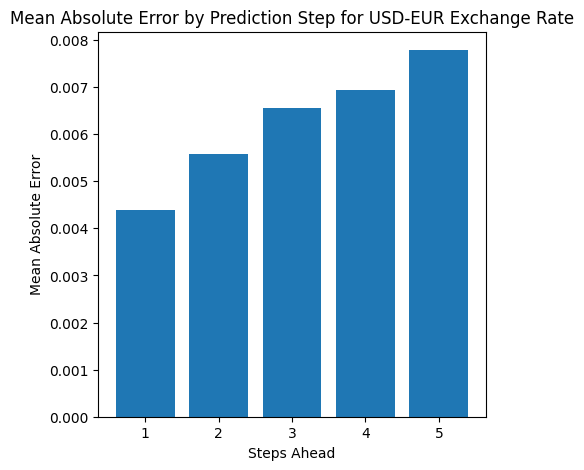

In [27]:
stepAheadChart(Exchangemetrics,'Mean Absolute Error by Prediction Step for USD-EUR Exchange Rate')

# 1 Step Ahead Predicction Plot Comparison

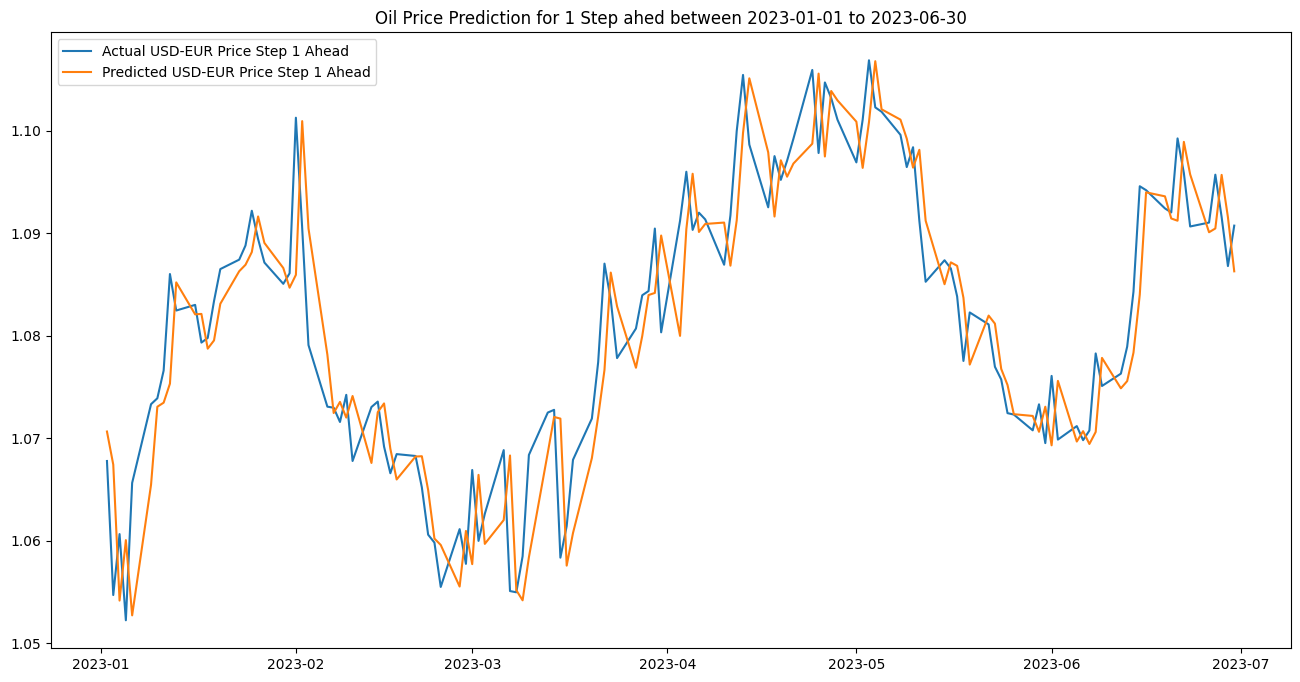

In [28]:
compare_plots(test_data['Actual_EUR_USD_Price_t+1'],
              test_data['Predicted_EUR_USD_Price_t+1'],
              "Actual USD-EUR Price Step 1 Ahead",
              "Predicted USD-EUR Price Step 1 Ahead",
              "Oil Price Prediction for 1 Step ahed between 2023-01-01 to 2023-06-30")


# 5 Step Ahead Predicction Plot Comparison

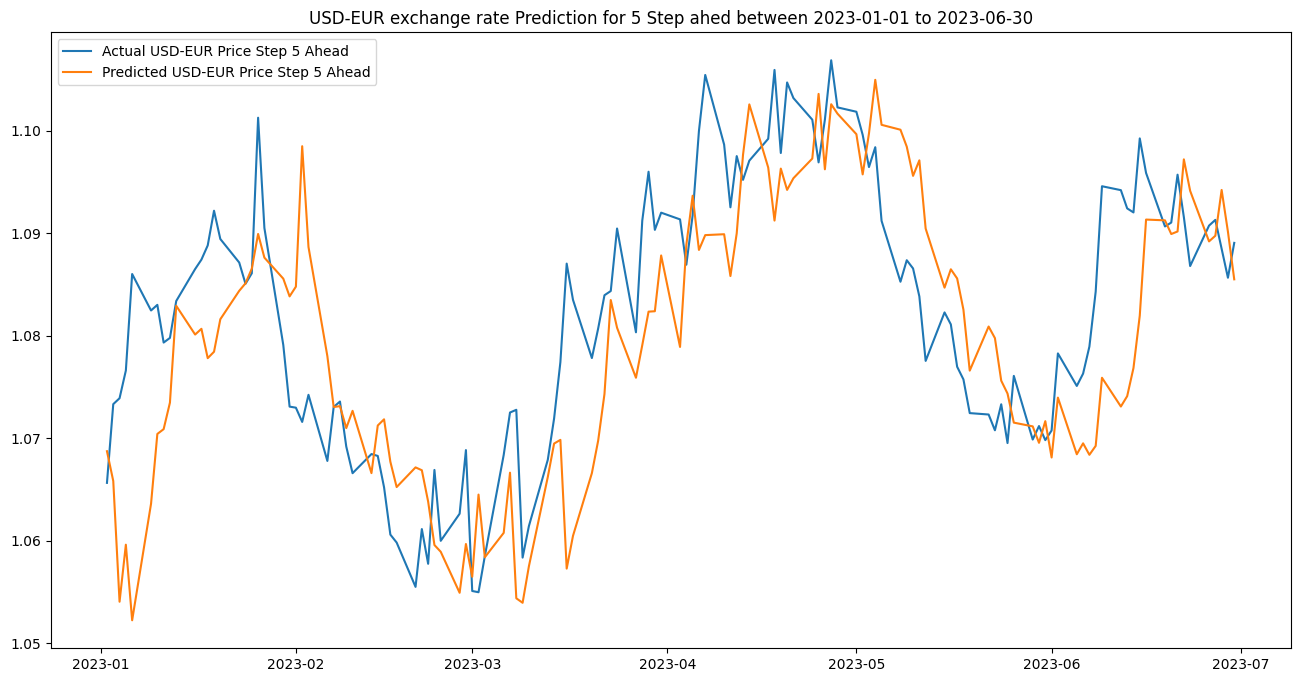

In [29]:
compare_plots(test_data['Actual_EUR_USD_Price_t+5'],
              test_data['Predicted_EUR_USD_Price_t+5'],
              "Actual USD-EUR Price Step 5 Ahead",
              "Predicted USD-EUR Price Step 5 Ahead",
              "USD-EUR exchange rate Prediction for 5 Step ahed between 2023-01-01 to 2023-06-30")


In [30]:
price_bands = [(1.05, 1.07), (1.06, 1.07), (1.07, 1.08), (1.08, 1.09), (1.09, 1.10), (1.10, 1.11)]
CurMetrics_bands = calculate_price_band_metrics(test_data, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_t+1', price_bands,1)
CurMetrics_bands


,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Price_Band,Number of Observations
0,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.005564,0.000046,0.006756,0.523836,1.05-1.07,30
1,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.005045,0.000035,0.005912,0.473202,1.06-1.07,20
2,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.003395,0.000018,0.004266,0.315612,1.07-1.08,31
3,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.003656,0.000021,0.004615,0.337027,1.08-1.09,26
4,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.004579,0.000030,0.005479,0.418392,1.09-1.1,33
5,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+1,1,0.005351,0.000045,0.006743,0.484897,1.1-1.11,10


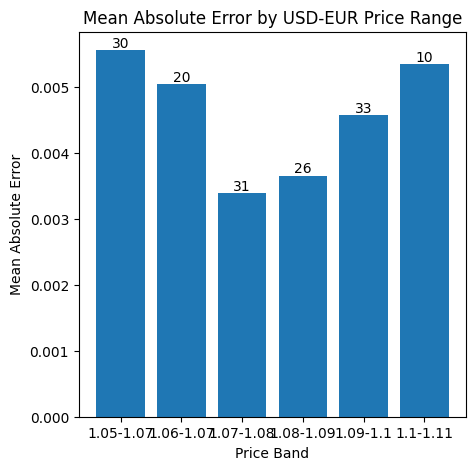

In [31]:
plot_metrics_by_band(CurMetrics_bands, 'Mean Absolute Error','Mean Absolute Error by USD-EUR Price Range')


#Oil

# Selecting the Feature Columns & Prediction Column whcih will be used for Prediction


In [32]:
DateAttributes=[]


In [33]:
FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-')]
FeatureColumnsOil.insert(0,'Actual_Oil_Price_t')
FeatureColumnsOil.extend(DateAttributes)

PredictedColumnOil='Actual_Oil_Price_t+1'
FeatureColumnsOil

['Actual_Oil_Price_t',
 'Actual_Oil_Price_t-1',
 'Actual_Oil_Price_t-2',
 'Actual_Oil_Price_t-3',
 'Actual_Oil_Price_t-4']

# Scaling the values to bring them on same Scale


In [34]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Initialize the scalers
Oilscaler = MinMaxScaler(feature_range=(0,1))
Oilscaler_y = MinMaxScaler(feature_range=(0,1))

# Extract and scale the input features
X_train_oil = train_data[FeatureColumnsOil].values
X_train_oil_scaled = Oilscaler.fit_transform(X_train_oil)

# Extract and scale the target variable, then reshape to 1D array for training
Y_train_oil = train_data[PredictedColumnOil].values
Y_train_oil_scaled = Oilscaler_y.fit_transform(Y_train_oil.reshape(-1,1)).ravel()


#Finding the Best Param


In [35]:
# Assuming you have X_train and Y_train already defined
best_params_Oil = find_best_svr_params(X_train_oil_scaled, Y_train_oil_scaled.ravel())
selected_columns = best_params_Oil.groupby('param_kernel')[['mean_test_score']].idxmax()
best_params_Oil = best_params_Oil.loc[selected_columns['mean_test_score'],
                         ['param_kernel', 'param_C',
                          'param_epsilon','param_gamma',
                          'mean_test_score']]
best_params_Oil.sort_values(by='mean_test_score', ascending=False)


,param_kernel,param_C,param_epsilon,param_gamma,mean_test_score
0,linear,10,0.005,NaN,0.984753
5,sigmoid,100,0.01,0.01,0.983502
7,rbf,100,0.005,0.01,0.983267


#Fitting the Model


In [36]:
for index, params in best_params_Oil.iterrows():
    model = train_svr(X_train_oil_scaled, Y_train_oil_scaled.ravel(), params.to_dict())

Score for linear: 0.9948623495125839
Score for rbf: 0.9949004890969619
Score for sigmoid: 0.9947973355225049


In [37]:
Oil_params = best_params_Cur[best_params_Cur['param_kernel'] == 'rbf']

Oilmodel = train_svr(X_train_oil_scaled, Y_train_oil_scaled.ravel(), Oil_params.iloc[0].to_dict())

Score for rbf: 0.9948650847855086


#Finding the support vectors


In [38]:

support_vector_indices = Oilmodel.support_
support_vectors_df = train_data.iloc[support_vector_indices]
support_vectors_df[['Actual_Oil_Price_t+1']].tail(5)
support_vectors_df[['Actual_Oil_Price_t+1']].count()

Actual_Oil_Price_t+1    360
dtype: int64

# Recursive multi-step forecasting using 1 Step Ahead model to Predict upto 5 Step Ahead for Oil Price


In [39]:
FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-')]
FeatureColumnsOil.insert(0,'Actual_Oil_Price_t')
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  print(f"Features used in Step {i} are {FeatureColumnsOil}")
  X_test = test_data[FeatureColumnsOil+DateAttributes].values
  X_test_scaled = Oilscaler.transform(X_test)
  scaled_predictions = Oilmodel.predict(X_test_scaled)
  scaled_predictions = scaled_predictions.reshape(-1, 1)
  predictions = Oilscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_Oil_Price_t+'+str(i)] = predictions
  FeatureColumnsOil.pop(-1)
  FeatureColumnsOil.insert(0,'Predicted_Oil_Price_t+'+str(i))


Features used in Step 1 are ['Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3', 'Actual_Oil_Price_t-4']
Features used in Step 2 are ['Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3']
Features used in Step 3 are ['Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2']
Features used in Step 4 are ['Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1']
Features used in Step 5 are ['Predicted_Oil_Price_t+4', 'Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t']


In [40]:
Oilresults = []

StepsAheadPrediction = 5
for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_Oil_Price_t+{i}'
    predicted_col = f'Predicted_Oil_Price_t+{i}'
    Oilresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

OilMetrics = pd.DataFrame(Oilresults)
OilMetrics


,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.141763,2.469711,1.571531,1.453264
1,Actual_Oil_Price_t+2,Predicted_Oil_Price_t+2,2,1.744619,5.483352,2.341656,2.220710
2,Actual_Oil_Price_t+3,Predicted_Oil_Price_t+3,3,2.162127,8.102159,2.846429,2.747687
3,Actual_Oil_Price_t+4,Predicted_Oil_Price_t+4,4,2.613239,10.356584,3.218165,3.315329
4,Actual_Oil_Price_t+5,Predicted_Oil_Price_t+5,5,2.933914,13.408014,3.661696,3.714244


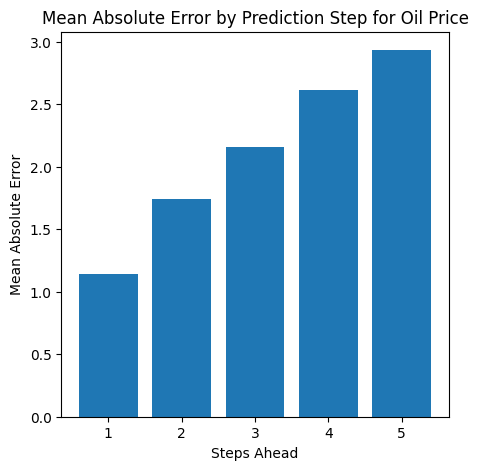

In [41]:
stepAheadChart(OilMetrics,'Mean Absolute Error by Prediction Step for Oil Price')


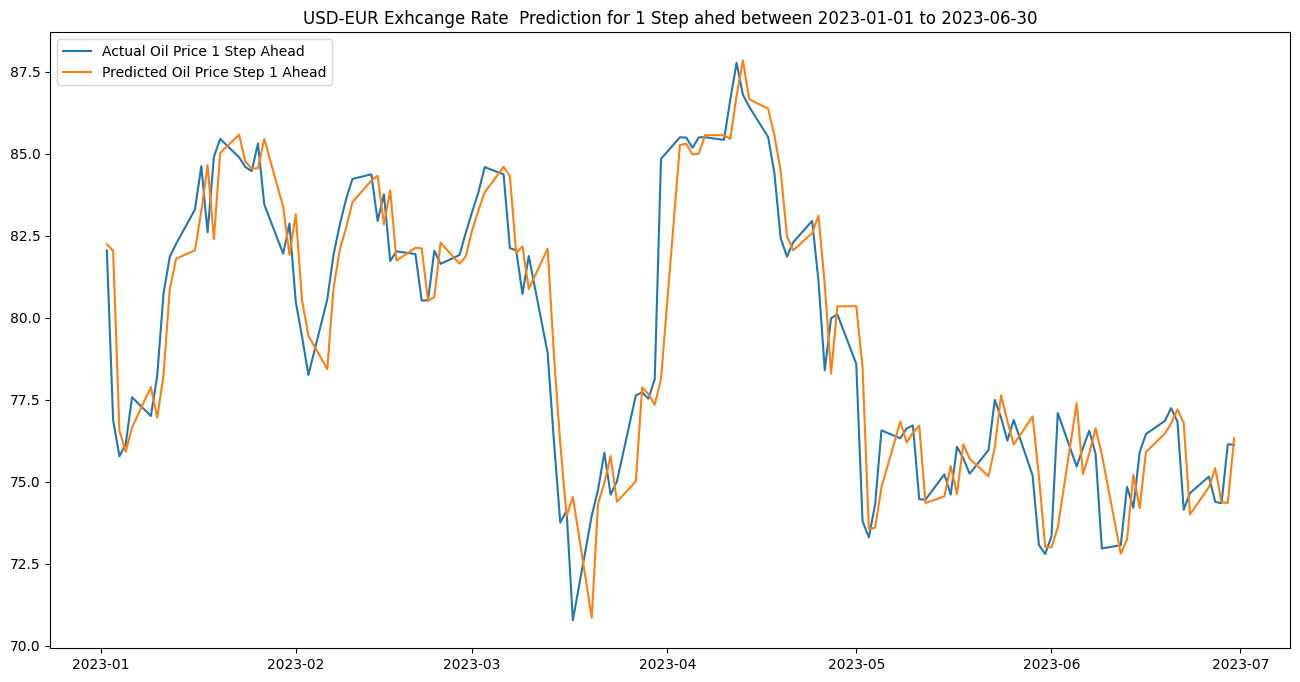

In [42]:
compare_plots(test_data['Actual_Oil_Price_t+1'],
              test_data['Predicted_Oil_Price_t+1'],
              "Actual Oil Price 1 Step Ahead",
              "Predicted Oil Price Step 1 Ahead",
              "USD-EUR Exhcange Rate  Prediction for 1 Step ahed between 2023-01-01 to 2023-06-30")


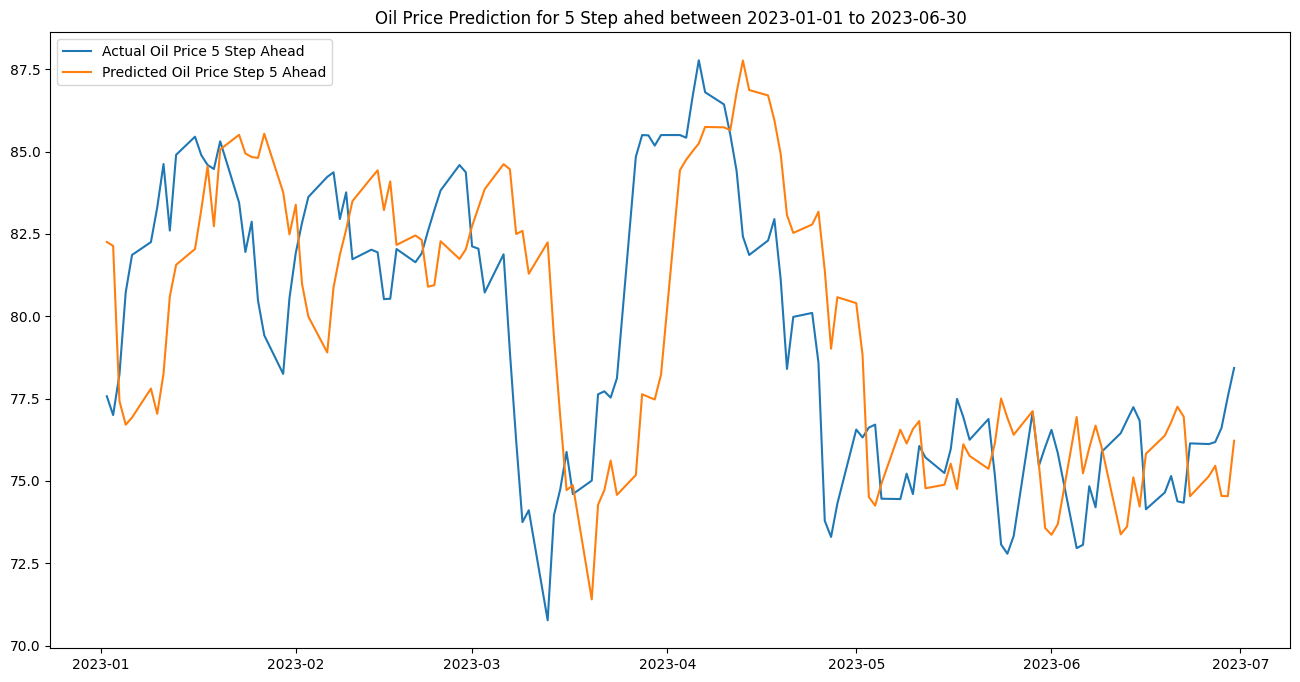

In [43]:
compare_plots(test_data['Actual_Oil_Price_t+5'],
              test_data['Predicted_Oil_Price_t+5'],
              "Actual Oil Price 5 Step Ahead",
              "Predicted Oil Price Step 5 Ahead",
              "Oil Price Prediction for 5 Step ahed between 2023-01-01 to 2023-06-30")


In [44]:
price_bands = [(70, 75), (75, 80), (80, 85), (85, 90)]
OilMetrics_bands = calculate_price_band_metrics(test_data, 'Actual_Oil_Price_t+1', 'Predicted_Oil_Price_t+1', price_bands,1)
OilMetrics_bands

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Price_Band,Number of Observations
0,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.421153,3.674984,1.917025,1.932211,70-75,23
1,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.177043,2.397413,1.548358,1.528238,75-80,46
2,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.140339,2.515573,1.586056,1.379693,80-85,48
3,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,0.527882,0.423791,0.650992,0.612251,85-90,13


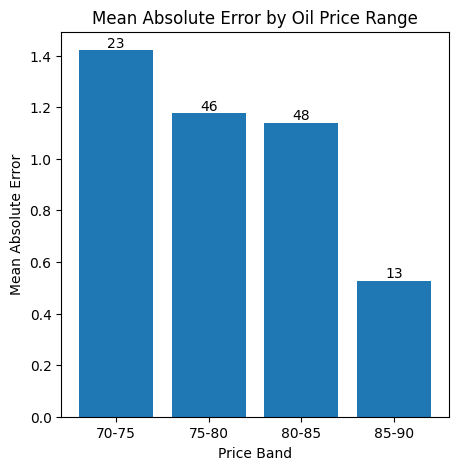

In [45]:
plot_metrics_by_band(OilMetrics_bands, 'Mean Absolute Error','Mean Absolute Error by Oil Price Range')


#Currency + OIL

# Selecting the Feature Columns & Prediction Column which will be used for Prediction


In [46]:
DateAttributes=[]


In [47]:
FeatureColumnsOilCurrency = [col for col in train_data.columns if col.startswith('Actual_EUR_USD_Price_t-')]
FeatureColumnsOilCurrency.insert(0,'Actual_EUR_USD_Price_t')
FeatureColumnsOilCurrency.append('Actual_Oil_Price_t+1')
FeatureColumnsOilCurrency.extend(DateAttributes)

PredictedColumnOilCurrency='Actual_EUR_USD_Price_t+1'
FeatureColumnsOilCurrency

['Actual_EUR_USD_Price_t',
 'Actual_EUR_USD_Price_t-1',
 'Actual_EUR_USD_Price_t-2',
 'Actual_EUR_USD_Price_t-3',
 'Actual_EUR_USD_Price_t-4',
 'Actual_Oil_Price_t+1']

# Scaling the values to bring them on same Scale


In [48]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
CurOilscaler = StandardScaler()

X_train = train_data[FeatureColumnsOilCurrency].values
X_train_CurOilscaled = CurOilscaler.fit_transform(X_train)

CurOilscaler_y = StandardScaler()

Y_train = train_data[PredictedColumnOilCurrency].values
Y_train_CurOilscaled = CurOilscaler_y.fit_transform(Y_train.reshape(-1,1))



#Finding the Best Param


In [49]:
# Assuming you have X_train and Y_train already defined
best_params_CurOil = find_best_svr_params(X_train_CurOilscaled, Y_train_CurOilscaled.ravel())
selected_columns = best_params_CurOil.groupby('param_kernel')[['mean_test_score']].idxmax()
best_params_CurOil = best_params_CurOil.loc[selected_columns['mean_test_score'],
                         ['param_kernel', 'param_C',
                          'param_epsilon','param_gamma',
                          'mean_test_score']]
best_params_CurOil.sort_values(by='mean_test_score', ascending=False)

,param_kernel,param_C,param_epsilon,param_gamma,mean_test_score
0,linear,100,0.005,NaN,0.979290
11,sigmoid,10,0.1,0.01,0.941228
13,rbf,100,0.1,0.01,0.939819


In [50]:
for index, params in best_params_CurOil.iterrows():
    print(params.to_dict())
    model = train_svr(X_train_CurOilscaled, Y_train_CurOilscaled.ravel(), params.to_dict())

{'param_kernel': 'linear', 'param_C': 100, 'param_epsilon': 0.005, 'param_gamma': nan, 'mean_test_score': 0.9792898168572167}
Score for linear: 0.9931597085847681
{'param_kernel': 'rbf', 'param_C': 100, 'param_epsilon': 0.1, 'param_gamma': 0.01, 'mean_test_score': 0.939818876917129}
Score for rbf: 0.9933195322936595
{'param_kernel': 'sigmoid', 'param_C': 10, 'param_epsilon': 0.1, 'param_gamma': 0.01, 'mean_test_score': 0.9412282158689862}
Score for sigmoid: 0.039817654448776274


#Fitting the Model

In [51]:

CurOil_params = best_params_Cur[best_params_Cur['param_kernel'] == 'rbf']
CurOilmodel = train_svr(X_train_CurOilscaled, Y_train_CurOilscaled.ravel(), CurOil_params.iloc[0].to_dict())

Score for rbf: 0.9933434030500544


In [52]:

support_vector_indices = CurOilmodel.support_
support_vectors_df = train_data.iloc[support_vector_indices]
support_vectors_df[['Actual_EUR_USD_Price_t+1']].count()

Actual_EUR_USD_Price_t+1    917
dtype: int64

#Recursive multi-step forecasting using 1 Step Ahead model to Preict upto 5 Step Ahead for USD-EUR Exchange rate by using Oil Prices to validate its impact


In [53]:
FeatureColumnsOilCurrency=['Actual_EUR_USD_Price_t','Actual_EUR_USD_Price_t-1','Actual_EUR_USD_Price_t-2','Actual_EUR_USD_Price_t-3','Actual_EUR_USD_Price_t-4']
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  FeatureColumnsOilCurrency.append('Predicted_Oil_Price_t+'+ str(i))
  print(f"Features used in Step {i} are {FeatureColumnsOilCurrency}")
  X_test = test_data[FeatureColumnsOilCurrency+DateAttributes].values
  X_test_scaled = CurOilscaler.transform(X_test)
  scaled_predictions = CurOilmodel.predict(X_test_scaled).reshape(-1, 1)
  # inverse transform the scaled predictions
  predictions = CurOilscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_EUR_USD_Price_WithOil_t+'+str(i)] = predictions
  FeatureColumnsOilCurrency.remove('Predicted_Oil_Price_t+'+ str(i))
  FeatureColumnsOilCurrency.pop(-1)
  FeatureColumnsOilCurrency.insert(0,'Predicted_EUR_USD_Price_WithOil_t+'+str(i))


Features used in Step 1 are ['Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Actual_EUR_USD_Price_t-3', 'Actual_EUR_USD_Price_t-4', 'Predicted_Oil_Price_t+1']
Features used in Step 2 are ['Predicted_EUR_USD_Price_WithOil_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Actual_EUR_USD_Price_t-3', 'Predicted_Oil_Price_t+2']
Features used in Step 3 are ['Predicted_EUR_USD_Price_WithOil_t+2', 'Predicted_EUR_USD_Price_WithOil_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Actual_EUR_USD_Price_t-2', 'Predicted_Oil_Price_t+3']
Features used in Step 4 are ['Predicted_EUR_USD_Price_WithOil_t+3', 'Predicted_EUR_USD_Price_WithOil_t+2', 'Predicted_EUR_USD_Price_WithOil_t+1', 'Actual_EUR_USD_Price_t', 'Actual_EUR_USD_Price_t-1', 'Predicted_Oil_Price_t+4']
Features used in Step 5 are ['Predicted_EUR_USD_Price_WithOil_t+4', 'Predicted_EUR_USD_Price_WithOil_t+3', 'Predicted_EUR_USD_Price_WithOil_t+2', 'Predicted_E

In [54]:
Exchangeresults = []
StepsAheadPrediction = 5

for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_EUR_USD_Price_t+{i}'
    predicted_col = f'Predicted_EUR_USD_Price_WithOil_t+{i}'
    Exchangeresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

OilExchangemetrics = pd.DataFrame(Exchangeresults)
OilExchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.004447,0.000031,0.005543,0.411572
1,Actual_EUR_USD_Price_t+2,Predicted_EUR_USD_Price_WithOil_t+2,2,0.005636,0.000054,0.007366,0.521532
2,Actual_EUR_USD_Price_t+3,Predicted_EUR_USD_Price_WithOil_t+3,3,0.006557,0.000070,0.008396,0.606460
3,Actual_EUR_USD_Price_t+4,Predicted_EUR_USD_Price_WithOil_t+4,4,0.006961,0.000085,0.009240,0.643172
4,Actual_EUR_USD_Price_t+5,Predicted_EUR_USD_Price_WithOil_t+5,5,0.007751,0.000099,0.009970,0.715542


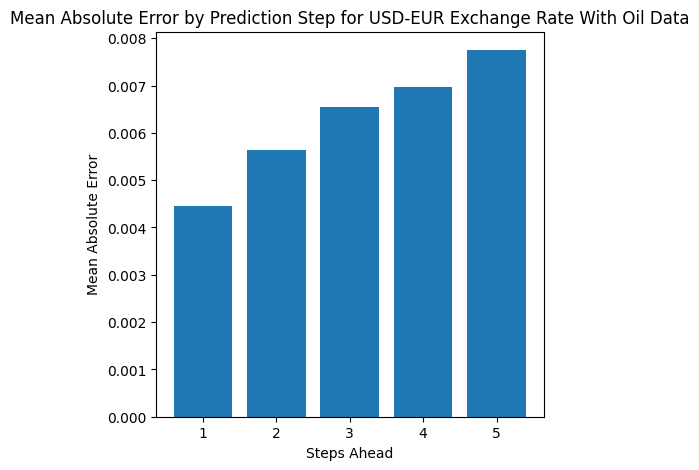

In [55]:
stepAheadChart(OilExchangemetrics,'Mean Absolute Error by Prediction Step for USD-EUR Exchange Rate With Oil Data')


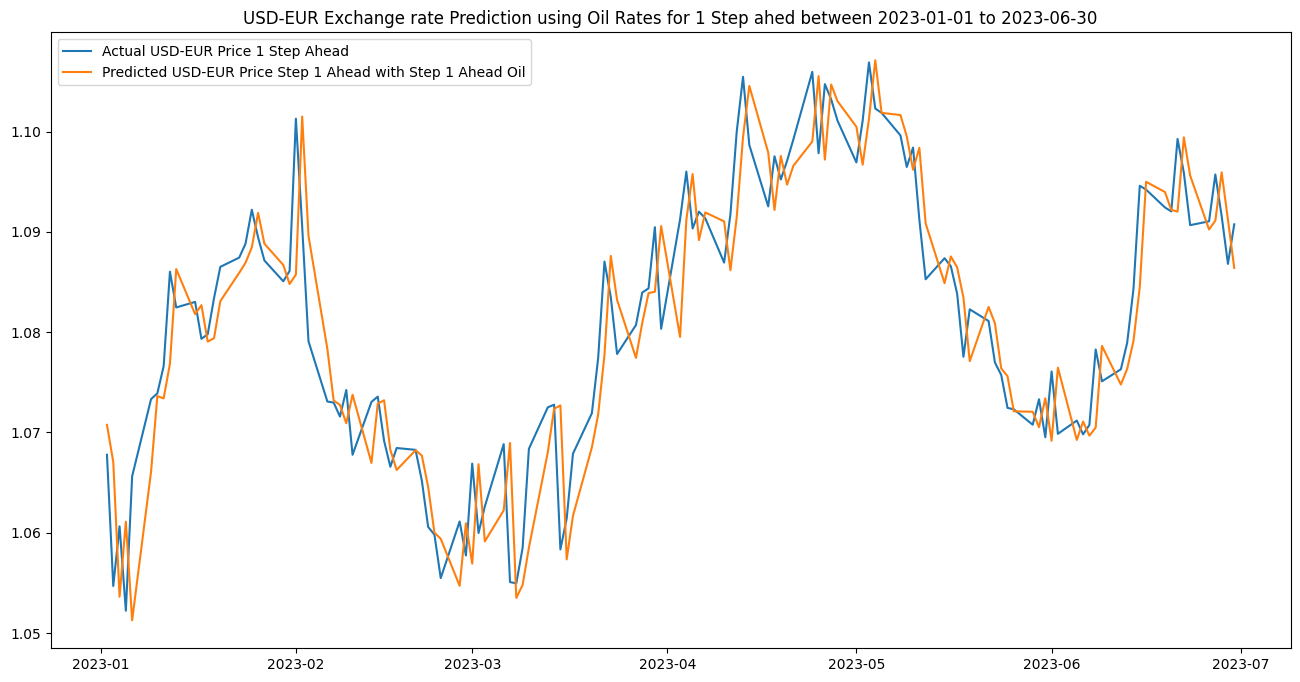

In [56]:
compare_plots(test_data['Actual_EUR_USD_Price_t+1'],
              test_data['Predicted_EUR_USD_Price_WithOil_t+1'],
              "Actual USD-EUR Price 1 Step Ahead",
              "Predicted USD-EUR Price Step 1 Ahead with Step 1 Ahead Oil",
              "USD-EUR Exchange rate Prediction using Oil Rates for 1 Step ahed between 2023-01-01 to 2023-06-30")


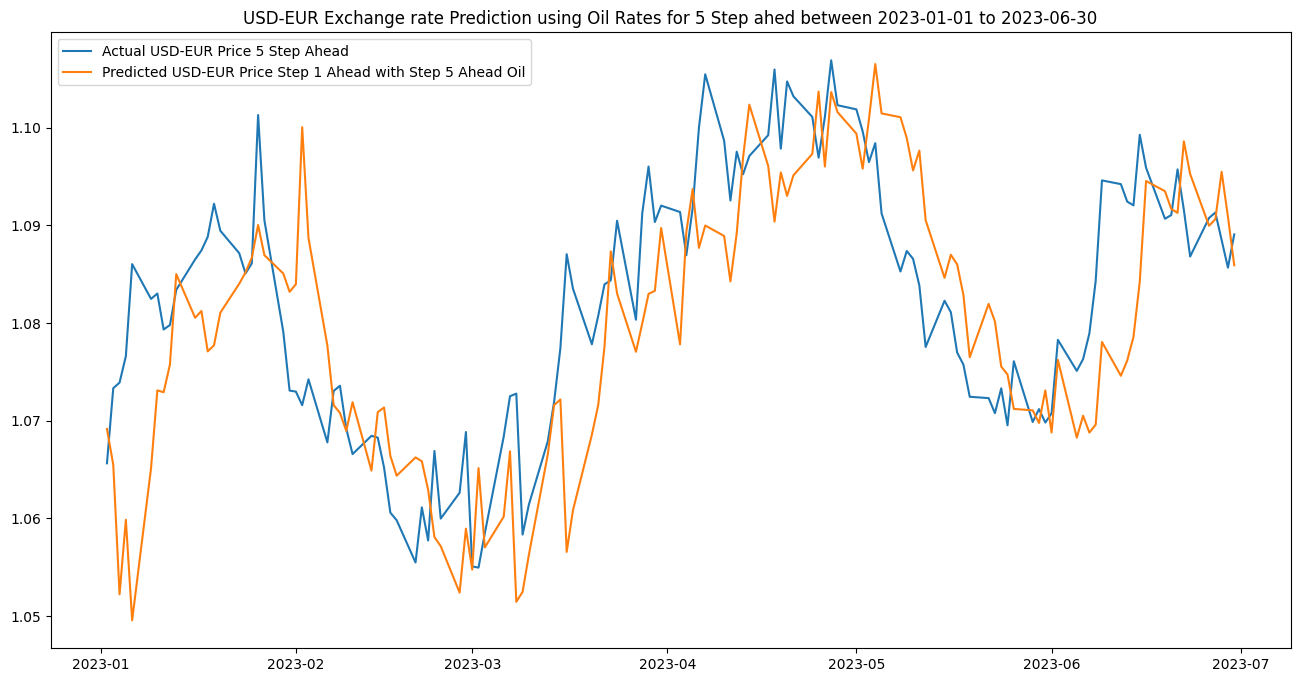

In [57]:
compare_plots(test_data['Actual_EUR_USD_Price_t+5'],
              test_data['Predicted_EUR_USD_Price_WithOil_t+5'],
              "Actual USD-EUR Price 5 Step Ahead",
              "Predicted USD-EUR Price Step 1 Ahead with Step 5 Ahead Oil",
              "USD-EUR Exchange rate Prediction using Oil Rates for 5 Step ahed between 2023-01-01 to 2023-06-30")


In [58]:
price_bands = [(1.05, 1.07), (1.06, 1.07), (1.07, 1.08), (1.08, 1.09), (1.09, 1.10), (1.10, 1.11)]
CurOilMetrics_bands = calculate_price_band_metrics(test_data, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_WithOil_t+1', price_bands,1)
CurOilMetrics_bands

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Price_Band,Number of Observations
0,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.005732,0.000049,0.007011,0.539715,1.05-1.07,30
1,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.005157,0.000038,0.006145,0.483751,1.06-1.07,20
2,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.003375,0.000018,0.004251,0.313732,1.07-1.08,31
3,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.003634,0.000020,0.004439,0.334993,1.08-1.09,26
4,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.004628,0.000030,0.005460,0.422951,1.09-1.1,33
5,Actual_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_WithOil_t+1,1,0.005429,0.000046,0.006804,0.492000,1.1-1.11,10


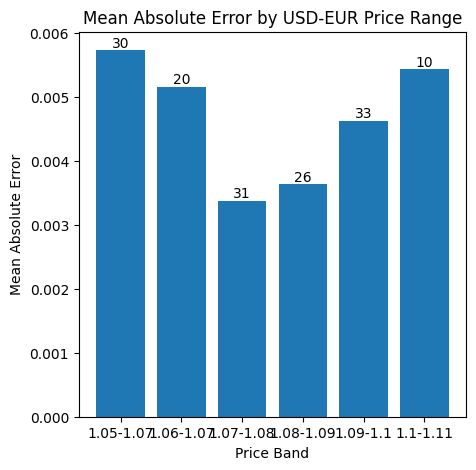

In [59]:
plot_metrics_by_band(CurOilMetrics_bands, 'Mean Absolute Error','Mean Absolute Error by USD-EUR Price Range')


In [60]:
test_data.to_csv("/content/drive/MyDrive/dissertation/test_SVR.csv")

In [61]:
combined_df = pd.concat([Exchangemetrics, OilMetrics, OilExchangemetrics], axis=0, ignore_index=True)
combined_df['Model'] = 'SVR'
combined_df.to_csv("/content/drive/MyDrive/dissertation/Mertics_SVR.csv")

In [62]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time} seconds")


Time taken: 64.38372898101807 seconds
